In [1]:
# ZUM AUSWERTEN DER STATELISTS #
# Generiert viele verschiedene Plots #
# ACHTUNG: Pfad muss noch in get_state_lists angepasst werden #

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools
import numpy as np

def plot_2positions(pos1, pos2, label1, label2, title, start, end):
    plt.plot(pos1[0][start:end], pos1[1][start:end], label=label1)
    plt.plot(pos2[0][start:end], pos2[1][start:end], label=label2)
    plt.axis('equal')
    plt.grid(True)
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_3positions(pos1, pos2, pos3, label1, label2, label3, title, start, end):
    plt.plot(pos1[0][start:end], pos1[1][start:end], label=label1)
    plt.plot(pos2[0][start:end], pos2[1][start:end], label=label2)
    plt.plot(pos3[0][start:end], pos3[1][start:end], label=label3)
    plt.axis('equal')
    plt.grid(True)
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_3positionsOverTime(x, pos1, pos2, pos3, pos1_label, pos2_label, pos3_label, title, start, end):

    fig, ax = plt.subplots()
    ax = plt.axes(projection='3d')
    ax.scatter3D(x[start:end], pos1[0][start:end], pos1[1][start:end], c=pos1[1][start:end], cmap='cool', label=pos1_label)
    ax.scatter3D(x[start:end], pos2[0][start:end], pos2[1][start:end], c=pos2[1][start:end], cmap='summer', label=pos2_label)
    ax.scatter3D(x[start:end], pos3[0][start:end], pos3[1][start:end], c=pos3[1][start:end], cmap='gist_earth', label=pos3_label)
    ax.grid(True)
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

    plt.show()
    
def plot_function(x, y, x_label, y_label, title, start, end):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.title(title)
    plt.show()
    
def plot_2functions(x,y1,y2,x_label, y1_label, y2_label, title, start, end):
    
    fig, ax = plt.subplots()
    ax.plot(x[start:end], y1[start:end], label=y1_label)
    ax.plot(x[start:end], y2[start:end], label=y2_label)
    ax.set_title(title)
    ax.grid(True)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.show()
    
    
def plot_3functions(x,y1,y2,y3,x_label, y1_label, y2_label, y3_label, title, start, end):
    
    fig, ax = plt.subplots()
    ax.plot(x[start:end], y1[start:end], label=y1_label)
    ax.plot(x[start:end], y2[start:end], label=y2_label)
    ax.plot(x[start:end], y3[start:end], label=y3_label)
    ax.set_title(title)
    ax.grid(True)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.show()
    
    
def plot_4functions(x,y1,y2,y3, y4, x_label, y1_label, y2_label, y3_label, y4_label, title, start, end):
    
    fig, ax = plt.subplots()
    ax.plot(x[start:end], y1[start:end], label=y1_label)
    ax.plot(x[start:end], y2[start:end], label=y2_label)
    ax.plot(x[start:end], y3[start:end], label=y3_label)
    ax.plot(x[start:end], y4[start:end], label=y4_label)
    ax.grid(True)
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    
    plt.show()

In [2]:
def get_state_lists(transport_type,robots):
    state_lists = []
    for i in range(robots):
        path = '/home/lydia/' + transport_type + '_state_list_' + str(i) + '.txt'
        # path = '/home/lydia/Schreibtisch/State_Lists/' + transport_type + '_state_list_' + str(i) + '.txt'
        print("path",path)
        with open(path, 'r') as doc:
            state_list = eval(doc.read())
        
        # Speicherung der Aktuellsten funktionierenden Statelist
        path = '/home/lydia/Schreibtisch/State_Lists/' + transport_type + '_state_list_' + str(i) + '.txt'
        with open(path, 'w') as doc:
            doc.write(str(state_list))
            
            
        start = 0
    #     start = len(state_list[0]) - 1000
    #     intervall = 500
    #     end = start + intervall 
        end = len(state_list[0])

        time = list(itertools.chain.from_iterable(state_list[0]))
        time = np.subtract(time, time[-1])

        velocitys = state_list[1]
        states = list(itertools.chain.from_iterable(state_list[2]))
        robot = state_list[3]
        object_centers = state_list[4]
        goal_positions = state_list[5]
        
        distance = []
        for i in range(0,len(object_centers[0])):
            p1 = [object_centers[0][i], object_centers[1][i]]
            p2 = [goal_positions[0][i], goal_positions[1][i]]
            distance.append(np.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2))

        if transport_type == 'caging':
            should_orientations = list(itertools.chain.from_iterable(state_list[6]))
            robots_in_quorum = list(itertools.chain.from_iterable(state_list[7]))
            errors = list(itertools.chain.from_iterable(state_list[8]))
            quorum = np.multiply(list(itertools.chain.from_iterable(state_list[9])),10)
            closure = np.multiply(list(itertools.chain.from_iterable(state_list[10])),20)
            caging_parameter = state_list[11][-1]
            
            state_dict = {'distance': distance,'start': start, 'end': end, 'time': time, 'velocitys': velocitys, 'states': states,
                          'robot': robot, 'object': object_centers, 'goal': goal_positions,
                          'should_orientations': should_orientations, 'robots_in_quorum': robots_in_quorum,
                          'errors': errors, 'quorum': quorum, 'closure': closure, 'caging_parameter': caging_parameter}
        elif transport_type == 'dynamic_change':
            if len(state_list[6]) > 0:
                shape_parameter = state_list[6][-1]
            else:
                shape_parameter = [0,0,0,0,0,0,0,0]
            state_dict = {'distance': distance,'start': start, 'end': end, 'time': time, 'velocitys': velocitys, 'states': states,
                          'robot': robot, 'object': object_centers, 'goal': goal_positions, 'shape_parameter': shape_parameter}
        else:
            state_dict = {'distance': distance,'start': start, 'end': end, 'time': time, 'velocitys': velocitys, 'states': states,
                          'robot': robot, 'object': object_centers, 'goal': goal_positions}
            
        state_lists.append(state_dict)
        
        
        
    return state_lists
        

def plot_lists(transport_type,robots):
    lists = get_state_lists(transport_type,robots)
    l = lists[0]
    for robot in lists:
        if len(robot['time']) < len(l['time']):
            l = robot
    start = l['start']
    end = l['end']
    
    if transport_type == "pushing":
        states = ["INIT", "SEARCH", "APPROACH", "CHECK_FOR_GOAL", "MOVE_AROUND_OBJECT", "PUSH", "STOP"]
    elif transport_type == "dynamic_change":
        states = ["INIT", "SEARCH", "APPROACH", "SURVEY_OBJECT", "PUSHING", "CAGING", "STOP"]
    elif transport_type == "caging":
        states = ["INIT", "SEARCH", "APPROACH", "SURVEY_OBJECT", "SURROUND", "TRANSPORT", "STOP"]
    
    # Einmal
    # Goal- and Object- Positions 
    plot_2positions(l['goal'],l['object'],'goal', 'object', 'Poses', start, end)
    
    # Object_Orientation
    plot_function(l['time'],l['object'][2],'time', 'orientation', 'Object orientation', start, end)
    
    # Distance to the Goal
    plot_function(l['time'],l['distance'],'time', 'distance', 'Distance to the Goal', start, end)
    
    # Robots-, Goal- and Object- Positions 
    fig, ax = plt.subplots()
    ax.plot(l['goal'][0][start:end], l['goal'][1][start:end], label='goal')
    ax.plot(l['object'][0][start:end], l['object'][1][start:end], label='object')
    for i in range(len(lists)):
        robot = lists[i]
        ax.plot(robot['robot'][0][start:end], robot['robot'][1][start:end], label='robot' + str(i))
    ax.grid(True)
    ax.set_title('Poses')
    ax.set_aspect('1')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.show()
    
    # States
#     fig, ax = plt.subplots()
#     for i in range(len(lists)):
#         robot = lists[i]
#         ax.plot(robot['time'][start:end], robot['states'][start:end], label='robot' + str(i))
#     ax.set_title('States')
#     ax.legend()
#     plt.show()
    
    counts = [[0] * len(l['time'][start:end]) for _ in range(len(states))]
    for robot in lists:
        j = 0
        for state in states: 
            for i in range(len(l['states'])):
                if robot['states'][i] == 'State.' + state:
                    counts[j][i] += 1 + (j - len(states)/2) * 0.0
            j += 1
        
    fig, ax = plt.subplots(figsize=(16, 4))
    for j in range(len(states)):
        ax.plot(l['time'][start:end], counts[j][start:end], label=states[j], marker='None', linestyle='-',  markersize=2)
    ax.grid(True)
#     ax.set_aspect('6')
    ax.set_ylim(0, robots+1)
    ax.yaxis.set_ticks(range(1, robots+1))
    ax.set_xlabel('time')
    ax.set_ylabel('Number of Robots in this State')
    ax.set_title('States')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.show()
    
    if transport_type == 'caging':
        # Robots in Quorum
        plot_function(l['time'],l['robots_in_quorum'],'time','robots_in_quorum','robots_in_quorum',start, end)
        
        # caging_parameter
        d_min = []
        d_max = []
        e = []
        r_cage = []
        min_robots = []
        
        for robot in lists:
            d_min.append(robot['caging_parameter'][0])
            d_max.append(robot['caging_parameter'][1])
            e.append(robot['caging_parameter'][2])
            r_cage.append(robot['caging_parameter'][3])
            min_robots.append(2 * np.pi * r_cage[-1] / (2 * 0.220 + d_min[-1]))
        fig, ax = plt.subplots(figsize=(5, 6))
        ax.boxplot([d_min, d_max, e, r_cage, min_robots], labels=["d_min", "d_max", "e", "r_cage", "min_robots"])
        ax.yaxis.set_ticks(np.arange(0, 5.5, 0.2))
        ax.set_ylabel("Value")
        ax.set_title("Caging parameter")
        ax.grid(True)
        plt.show()
        
    if transport_type == 'dynamic_change':
        # shape_parameter
        d_min = []
        d_max = []
        height = []
        area = []
        weight = []
        e = []
        r_cage = []
        convex = []
        for robot in lists:
            if len(robot['shape_parameter']) > 0:
                d_min.append(robot['shape_parameter'][0])
                d_max.append(robot['shape_parameter'][1])
                height.append(robot['shape_parameter'][2])
                area.append(robot['shape_parameter'][3] / 100000)
                weight.append(robot['shape_parameter'][4] / 100000)
                e.append(robot['shape_parameter'][5])
                r_cage.append(robot['shape_parameter'][6])
                convex.append(float(robot['shape_parameter'][7]))
            
        fig, ax = plt.subplots()
        ax.boxplot([d_min, d_max, height, area, weight, e, r_cage, convex], labels=["d_min", "d_max", "height", "area", "weight", "e", "r_cage", "convex"])
        ax.set_ylabel("Value")
        ax.set_title("Shape parameter")
        ax.grid(True)
        plt.show()
    
    i = 0
    for l in lists:
    # Je Roboter
        # Velocity
#         plot_2functions(l['time'],l['velocitys'][0],l['velocitys'][1],'time','linear', 'angular','Velocity', start, end)

        # Goal-, Object- and Robotpositions over Time 3D
#         plot_3positionsOverTime(l['time'],l['robot'], l['object'], l['goal'],'robot', 'object', 'goal', 'Positions', start, end)

        # Goal-, Object- and Robotpositions 2D
        plot_3positions(l['robot'], l['object'], l['goal'],'robot', 'object', 'goal', 'Positions ' + str(i), start, end)

        # States
        plot_function(l['time'],l['states'],'time','state','States '  + str(i), start, end)


        if transport_type == 'caging':
            # Robot in Quorum/Closure
            plot_2functions(l['time'], l['quorum'], l['closure'],'time', 'quorum', 'closure', 'FLAGS '  + str(i), start, end)

            # Orientation should vs is
#             plot_2functions(l['time'], l['robot'][2], l['should_orientations'],'time', 'is', 'should', 'orientation '  + str(i), start, end)

            # Orientation Error
#             plot_function(l['time'], l['errors'], 'time', 'error', 'Orientation Error '  + str(i), start, end)
        i += 1



path /home/lydia/caging_state_list_0.txt
path /home/lydia/caging_state_list_1.txt
path /home/lydia/caging_state_list_2.txt
path /home/lydia/caging_state_list_3.txt
path /home/lydia/caging_state_list_4.txt


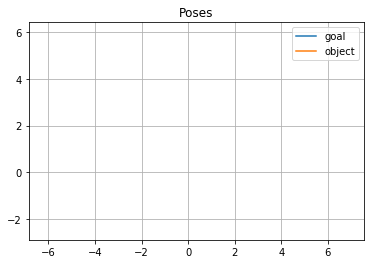

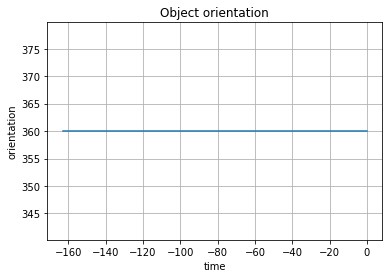

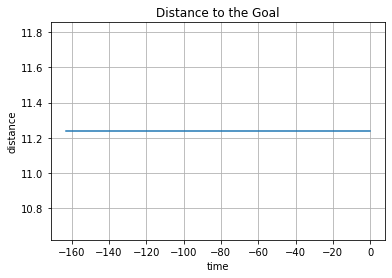

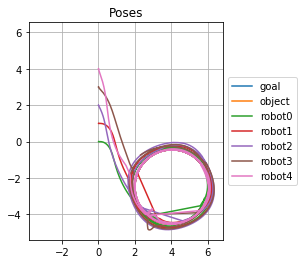

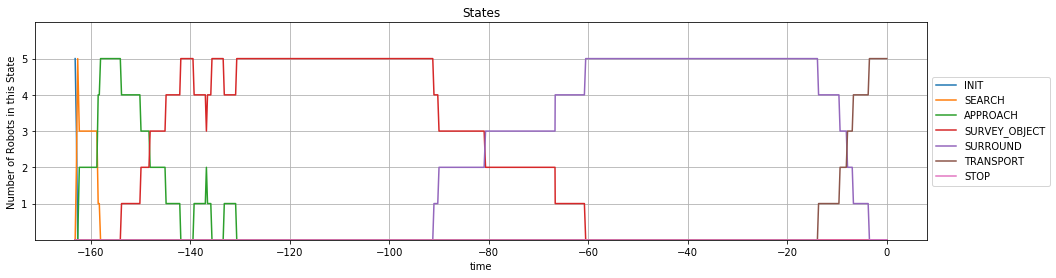

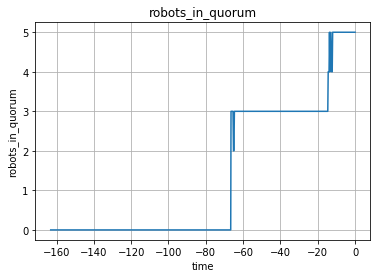

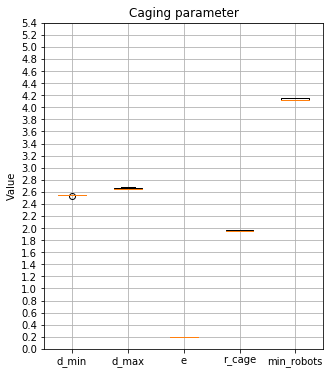

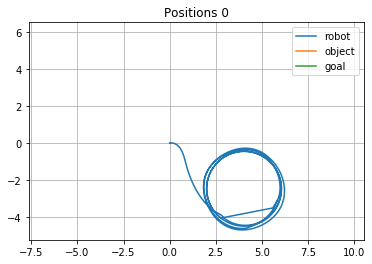

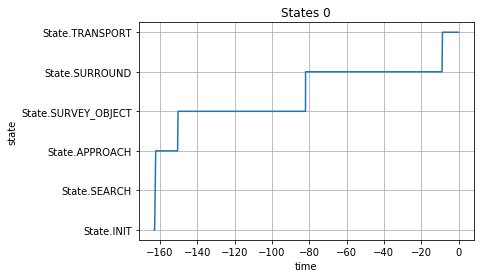

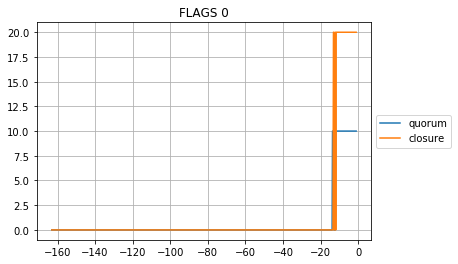

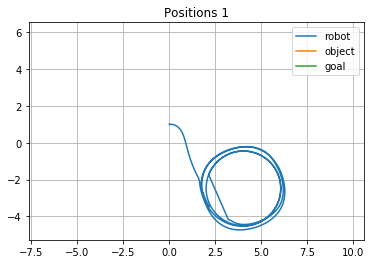

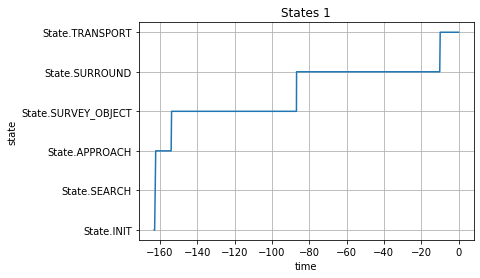

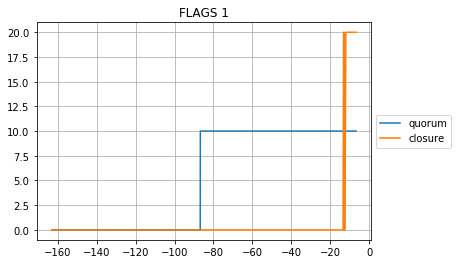

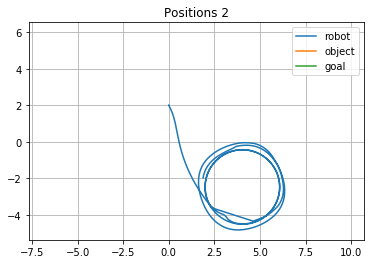

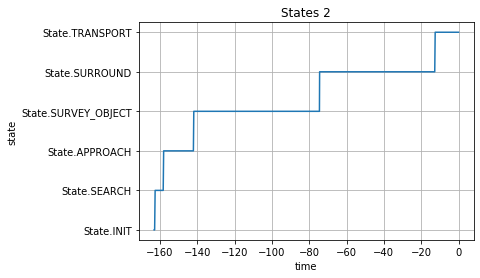

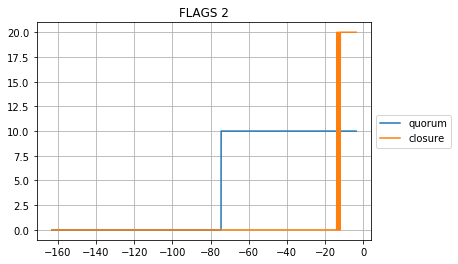

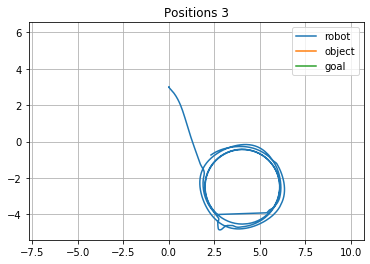

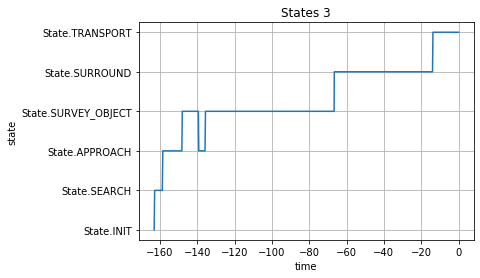

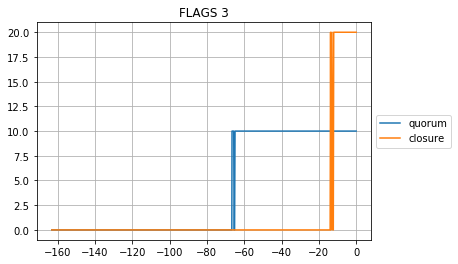

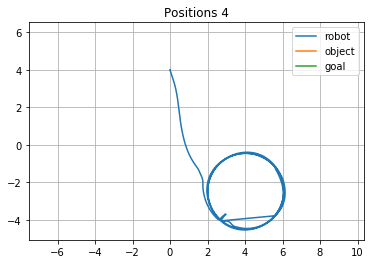

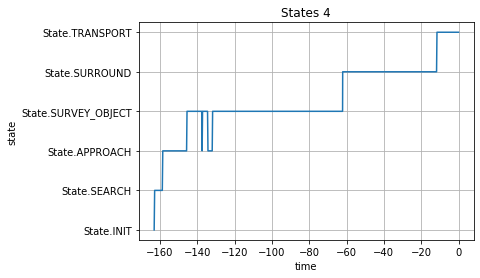

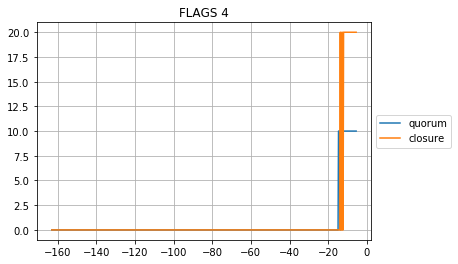

In [3]:
transport_types = ['pushing','caging','dynamic_change']
plot_lists(transport_types[1], 5) # Transport Strategie, Anzahl Roboter